In [1]:
from requests import get
import matplotlib.pyplot as plt
from pprint import pprint
import os
import csv
import pandas as pd

In [2]:
url = "https://asos2.p.rapidapi.com/v2/auto-complete" #  changes based on route

headers = {
    "X-RapidAPI-Key": "",
    "X-RapidAPI-Host": "asos2.p.rapidapi.com"
}

def autocomplete_viz(search_term, store, country):
    querystring = {"q": search_term, "store": store, "country": country}

    autocomplete_response = get(url, headers=headers, params=querystring).json()
    
    suggestions = autocomplete_response["suggestionGroups"][0]["suggestions"]

    search_terms, number_results = [], []
    
    for suggestions in suggestions:
        search_terms.append(suggestions['searchTerm'])
        number_results.append(suggestions['numberOfResults'])
    
    plt.barh(search_terms, number_results)
    
    plt.title("Results for " + search_term)
    plt.xlabel("Results")
     
    search_result_df = pd.DataFrame({ "Search Term": search_terms,
                                     "Number of Results": number_results,
                                    })
    search_result_df.sort_values("Number of Results", ascending=False)
    return (search_result_df, plt.barh)
        
    # print("search term:", search_terms)
    # print("number of results:", number_results)
                           

(             Search Term  Number of Results
 0        cargo pants men                432
 1           mens hoodies               1553
 2              men suits               3095
 3          mens sweaters               1364
 4               nike men               1671
 5             mens jeans               2089
 6  oversized t shirt men               2845
 7           cardigan men                142
 8           mens jackets               3626
 9     the north face men                394,
 <function matplotlib.pyplot.barh(y, width, height=0.8, left=None, *, align='center', **kwargs)>)

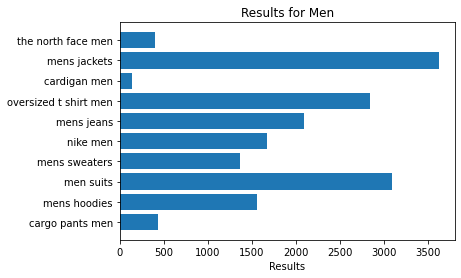

In [3]:
autocomplete_viz("Men", "US", "US")

(            Search Term  Number of Results
 0     cargo pants women                340
 1            nike women               2120
 2      womens jumpsuits               1457
 3  the north face women                411
 4     trench coat women                271
 5         loafers women                284
 6          blazer women               1564
 7          adidas women               1052
 8       womens sweaters               2796
 9        cardigan women               1091,
 <function matplotlib.pyplot.barh(y, width, height=0.8, left=None, *, align='center', **kwargs)>)

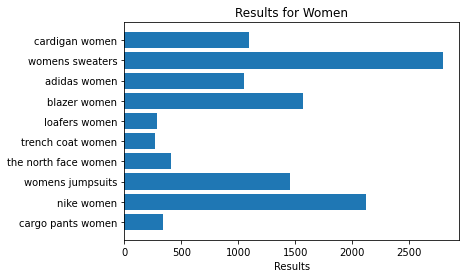

In [4]:
autocomplete_viz("Women", "US", "US")

(                     Search Term  Number of Results
 0                 mocassin homme                466
 1                chaussure homme               4090
 2                     nike homme               2225
 3              chaussettes homme               1634
 4                 bottines homme                678
 5                   bottes homme                520
 6                     cuir homme               1607
 7  mocassins en cuir pour hommes                218,
 <function matplotlib.pyplot.barh(y, width, height=0.8, left=None, *, align='center', **kwargs)>)

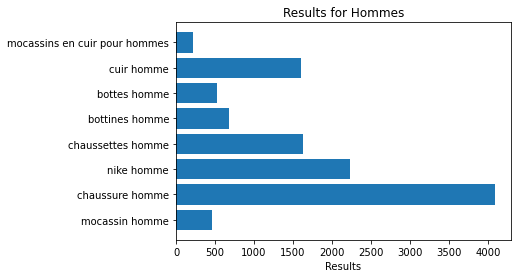

In [5]:
autocomplete_viz("Hommes", "FR", "FR") #France

English translation corresponding to df: moccasin man, Man's shoe, nike man, man tap, men's ankle boots, man boots, leather man, leather loafers for men

(                  Search Term  Number of Results
 0              doudoune femme               1650
 1                  pull femme               6794
 2             mocassins femme                409
 3                bottes femme               1613
 4              bottines femme               1068
 5                basket femme               3845
 6               chemise femme               8414
 7            chaussures femme              10854
 8           chaussettes femme                836
 9  chemisier et blouse femmes               4873,
 <function matplotlib.pyplot.barh(y, width, height=0.8, left=None, *, align='center', **kwargs)>)

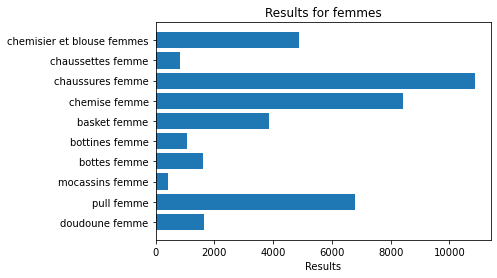

In [6]:
autocomplete_viz("femmes", "FR", "FR")

English translation corresponding to df: down jacket woman, women moccasins, woman boots, women ankle boots, basketball woman, woman shirt, down jacket without
female sleeve, shoes women, women's slippers, woman socks

(            Search Term  Number of Results
 0            felpa uomo               4529
 1  pantaloni cargo uomo                829
 2            jeans uomo               5258
 3         maglione uomo               3221
 4           giacca uomo               7082
 5   felpa oversize uomo               1321
 6             tuta uomo               1741
 7        pantaloni uomo               9800
 8          piumino uomo                965
 9   varsity jacket uomo                230,
 <function matplotlib.pyplot.barh(y, width, height=0.8, left=None, *, align='center', **kwargs)>)

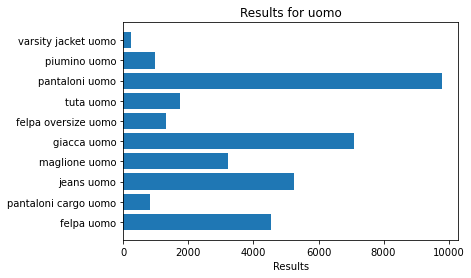

In [7]:
autocomplete_viz("uomo", "IT", "IT") #Italy

English translation corresponding to df: men's sweatshirt, men's cargo pants, men's jeans, man jacket, men's oversized sweatshirt, man sweater, men's pants, man suit, men's down jacket, varsity jacket man

(               Search Term  Number of Results
 0          mocassini donna                413
 1            stivali donna               1589
 2  completo tailleur donna              16002
 3              felpe donna               3625
 4           maglioni donna               6909
 5         stivaletti donna                987
 6    abito cerimonia donna               5704
 7           cappotto donna               7034
 8             blazer donna               2854
 9            piumino donna               1366,
 <function matplotlib.pyplot.barh(y, width, height=0.8, left=None, *, align='center', **kwargs)>)

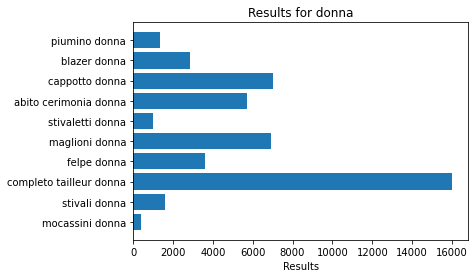

In [8]:
autocomplete_viz("donna", "IT", "IT")

English translation: women's moccasins, women's boots, full suit woman, women's sweatshirts, women's sweaters, women's ankle boots, woman ceremony dress, women's coat, women's blazer, women's down jacket

(               Search Term  Number of Results
 0       tommy hilfiger men                  2
 1              mens shirts                  1
 2             mens tshirts                  1
 3        mens under armour                  1
 4           mens dungarees                  2
 5  short sleeve shirts men                  1
 6            mens overalls                  2
 7             mens watches                  9
 8              t shirt men                  1,
 <function matplotlib.pyplot.barh(y, width, height=0.8, left=None, *, align='center', **kwargs)>)

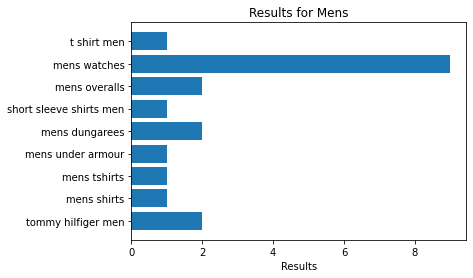

In [9]:
autocomplete_viz("Mens", "AU", "AU")

(              Search Term  Number of Results
 0             womens nike                  2
 1    tommy hilfiger women                  1
 2           womens shirts                  7
 3         womens sneakers                  2
 4      womens new balance                  1
 5           womens adidas                  7
 6  womens curve plus size                  1
 7             womens tops                  1
 8            womens pants                  1
 9        womens underwear                 26,
 <function matplotlib.pyplot.barh(y, width, height=0.8, left=None, *, align='center', **kwargs)>)

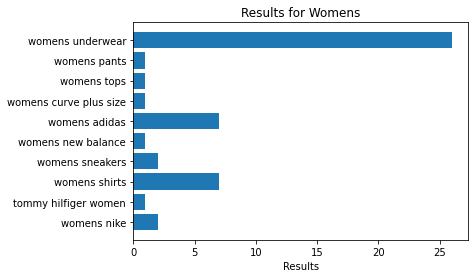

In [10]:
autocomplete_viz("Womens", "AU", "AU")

(                Search Term  Number of Results
 0          sudaderas hombre               5498
 1  camiseta oversize hombre               4561
 2     pantalon cargo hombre                994
 3              traje hombre               6089
 4            chandal hombre               1356
 5          camisetas hombre              28910
 6  sudadera oversize hombre               1504
 7            joggers hombre               3099
 8            camisas hombre               9635
 9     the north face hombre                751,
 <function matplotlib.pyplot.barh(y, width, height=0.8, left=None, *, align='center', **kwargs)>)

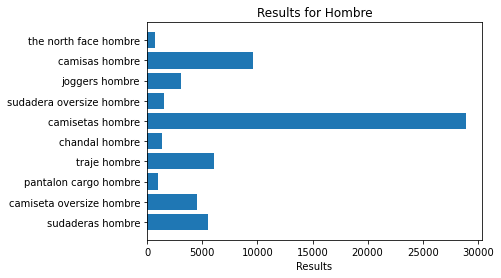

In [11]:
autocomplete_viz("Hombre", "ES", "ES")

(             Search Term  Number of Results
 0     botas cowboy mujer                 62
 1        sudaderas mujer               3451
 2     mocasines de mujer                384
 3           abrigo mujer               6089
 4  zapatillas nike mujer                717
 5            botas mujer               1555
 6           jersey mujer               2226
 7            traje mujer               3002
 8          botines mujer                544
 9          chandal mujer                684,
 <function matplotlib.pyplot.barh(y, width, height=0.8, left=None, *, align='center', **kwargs)>)

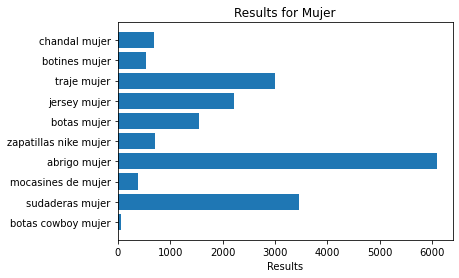

In [12]:
autocomplete_viz("Mujer", "ES", "ES")

(           Search Term  Number of Results
 0   winterjacke herren                  4
 1         jeans herren                 95
 2        hoodie herren                  5
 3      pullover herren                  5
 4  pufferjacken herren                  3
 5         weste herren                  7
 6        jacken herren                  3
 7         hosen herren                117
 8               herren              74426
 9        mäntel herren                129,
 <function matplotlib.pyplot.barh(y, width, height=0.8, left=None, *, align='center', **kwargs)>)

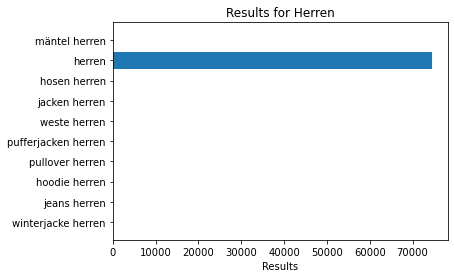

In [13]:
autocomplete_viz("Herren", "DE", "DE")

English translation: men's jeans, hoodie men, sweater men, men's puffer jackets, vest men, jackets men, trousers men, Men's, coats men, shirt men

(           Search Term  Number of Results
 0                damen             128573
 1      oberteile damen                387
 2  nike damen pullover                145
 3           damen sale               6072,
 <function matplotlib.pyplot.barh(y, width, height=0.8, left=None, *, align='center', **kwargs)>)

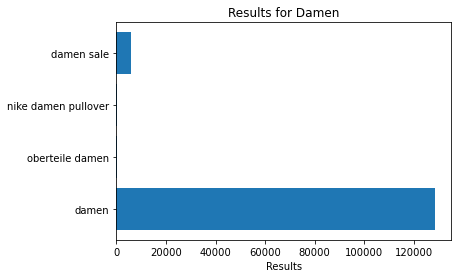

In [14]:
autocomplete_viz("Damen", "DE", "DE")

English translation: ladies, tops ladies, nike women sweater, ladies sale

READING IN MYNTRA CSV AND DATA PRE-PROCESSING

In [15]:
csv_path = "myntra csv/myntra_products_catalog.csv"
myntra_csv = pd.read_csv(csv_path, encoding="utf-8")
myntra_csv.head(20)

new_myntra_df = myntra_csv[["ProductName", "ProductBrand","Gender", "Price (INR)", "Description", "PrimaryColor"]]
new_myntra_df

,ProductName,ProductBrand,Gender,Price (INR),Description,PrimaryColor
0,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,"Black and grey printed medium trolley bag, sec...",Black
1,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,Beige & Grey made to measure kurta with churid...,Beige
2,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,Blue self-design bandhgala suitBlue self-desig...,Blue
4,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,"Brown and off-white printed casual shirt, has ...",White
...,...,...,...,...,...,...
12486,Pepe Jeans Men Black Hammock Slim Fit Low-Rise...,Pepe Jeans,Men,1299,"Black dark wash 5-pocket low-rise jeans, clean...",Black
12487,Mochi Women Gold-Toned Solid Heels,Mochi,Women,1990,"A pair of gold-toned open toe heels, has regul...",Gold
12488,612 league Girls Navy Blue & White Printed Reg...,612 league,Girls,602,Navy Blue and White printed mid-rise denim sho...,Blue
12489,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,Bvlgari,Men,8950,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,NaN


In [133]:
new_myntra_df["Gender"].value_counts()

Women          5126
Men            4591
Unisex         1188
Boys           1100
Girls           440
Unisex Kids      46
Name: Gender, dtype: int64

FURTHER DATA CLEANUP

In [17]:
men_women_df = new_myntra_df.replace({'Boys': 'Men' , 'Girls': 'Women'}) #Keeping dataset intact but disregarding distinction between adults and children
men_women_df = new_myntra_df[(new_myntra_df["Gender"]!='Unisex Kids') & (new_myntra_df["Gender"]!='Unisex')] #We do not know which gender bought 'product name'
men_women_df

,ProductName,ProductBrand,Gender,Price (INR),Description,PrimaryColor
1,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,Beige & Grey made to measure kurta with churid...,Beige
2,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,Blue self-design bandhgala suitBlue self-desig...,Blue
4,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,"Brown and off-white printed casual shirt, has ...",White
5,SHOWOFF Men Brown Solid Slim Fit Regular Shorts,SHOWOFF,Men,791,"Brown solid low-rise regular shorts, has four ...",Brown
...,...,...,...,...,...,...
12486,Pepe Jeans Men Black Hammock Slim Fit Low-Rise...,Pepe Jeans,Men,1299,"Black dark wash 5-pocket low-rise jeans, clean...",Black
12487,Mochi Women Gold-Toned Solid Heels,Mochi,Women,1990,"A pair of gold-toned open toe heels, has regul...",Gold
12488,612 league Girls Navy Blue & White Printed Reg...,612 league,Girls,602,Navy Blue and White printed mid-rise denim sho...,Blue
12489,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,Bvlgari,Men,8950,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,NaN


<AxesSubplot:xlabel='ProductBrand', ylabel='Price (INR)'>

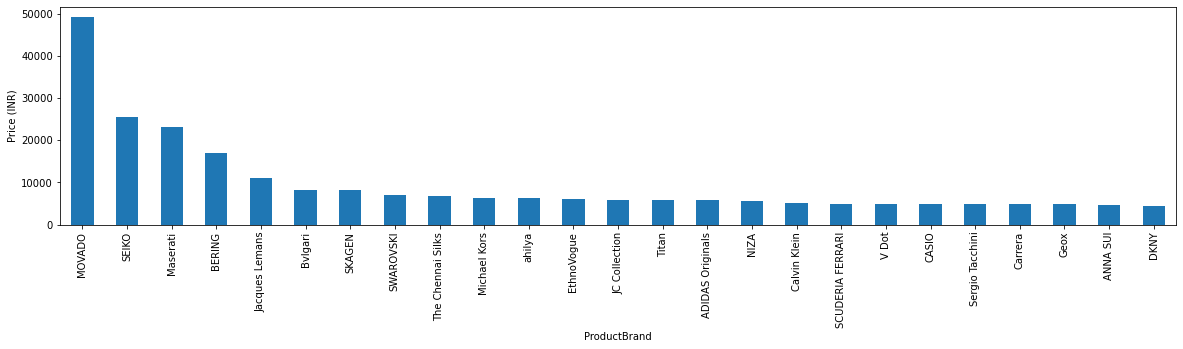

In [112]:
#Top 25 brands for men and women (compound bar chart)
plt.figure(figsize=(20,4))
plt.ylabel('Price (INR)')
top_brand_df = men_women_df.groupby('ProductBrand')['Price (INR)'].mean().sort_values(ascending=False).head(25)
top_brand_df.plot.bar()

In [113]:
# Empty Lists to Hold All of the Men's & Women's Brands, respectively
mens_brands = []
womens_brands = [] 

# Loop Through Entire DataFrame
for x in range(len(men_women_df)):
    
    # Check if the row of data is Men's Data
    if men_women_df["Gender"][x] == "Men":
        
        # Add it to men's list
        mens_brands.append(men_women_df["ProductBrand"][x])
    
    # Check if the row of data is Women's data
    elif men_women_df["Gender"][x] == "Women":
        
        # Add it to the women's list
        womens_brands.append(men_women_df["ProductBrand"][x])
        
# Get a Unique list of men's brands        
mens_brands = set(mens_brands)

# Get a Unique list of women's brands        
womens_brands = set(womens_brands)

# Check if there are any brands that are in both men's and women's catergory
if len(mens_brands.intersection(womens_brands)) > 0:
    
    # Create a list of the brands that are not mutually exclusive
    both = list((mens_brands.intersection(womens_brands)))

In [114]:
# Empty Dictionaries to hold the name and count of brands by sex
men_dict = {}
women_dict = {}


# Loop Through dataframe
for x in range(len(men_women_df)):
    
    # check if row of data is men's data
    if men_women_df["Gender"][x] == "Men":
        
        # Check if the brand is in the "both" list
        if men_women_df["ProductBrand"][x] in both:
            
            # Check if the brand hasn't been added to the dictionary
            if men_women_df["ProductBrand"][x] not in men_dict:
                
                # add it to the dictionary
                men_dict[men_women_df["ProductBrand"][x]] = 1
                
            # Check if the brand has been added to the dictionary
            elif men_women_df["ProductBrand"][x] in men_dict:
                
                # increment the list value by one
                men_dict[men_women_df["ProductBrand"][x]] += 1
                
    # check if row of data is women's data         
    if men_women_df["Gender"][x] == "Women":
        
        # Check if the brand is in the "both" list
        if men_women_df["ProductBrand"][x] in both:
            
            # Check if the brand hasn't been added to the dictionary
            if men_women_df["ProductBrand"][x] not in women_dict:
                
                # add it to the dictionary
                women_dict[men_women_df["ProductBrand"][x]] = 1
                
            # Check if the brand has been added to the dictionary
            elif men_women_df["ProductBrand"][x] in women_dict:
                
                # increment the list value by one
                women_dict[men_women_df["ProductBrand"][x]] += 1

In [115]:
women_dict["Police"]

1

In [116]:
bar_brand_data = pd.DataFrame.from_dict([men_dict, women_dict]).T


bar_brand_data = bar_brand_data.reset_index()

bar_brand_data.columns = ["Brand", "Men", "Women"]

bar_brand_data

,Brand,Men,Women
0,Police,3,1
1,Michael Kors,4,7
2,Campus Sutra,35,1
3,AIGNER,4,3
4,HARBORNBAY,1,2
...,...,...,...
69,Metro,3,30
70,INVU,3,1
71,ESPRIT,1,1
72,Russell Athletic,1,5


In [117]:
most_pop_men = list(bar_brand_data["Men"].sort_values().tail(4).keys())

In [118]:
most_pop_women = list(bar_brand_data["Women"].sort_values().tail(4).keys())

most_pop = most_pop_men + most_pop_women

bar_brand_data = bar_brand_data.iloc[most_pop].reset_index(drop=True)
bar_brand_data

,Brand,Men,Women
0,Roadster,114,108
1,Park Avenue,151,22
2,Flying Machine,162,23
3,Puma,167,34
4,GIORDANO,11,50
5,Mast & Harbour,33,58
6,Roadster,114,108
7,HERE&NOW,46,118


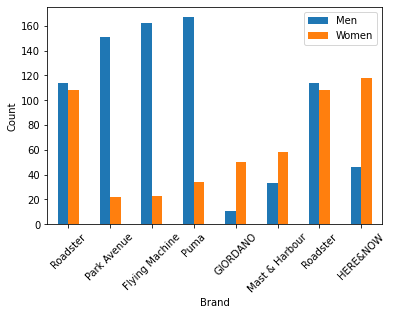

In [136]:
#Want to create side by side  bar chart with index gender for top 8 brands 
# plt.figure(figsize=(20,4))
fig,ax=plt.subplots()
bar_brand_data.plot.bar(rot=45,ax=ax)
plt.xlabel('Brand')
plt.ylabel('Count')
ax.legend(['Men', 'Women'])
ax.set_xticklabels(bar_brand_data['Brand']);

<AxesSubplot:xlabel='Gender', ylabel='Price(INR)'>

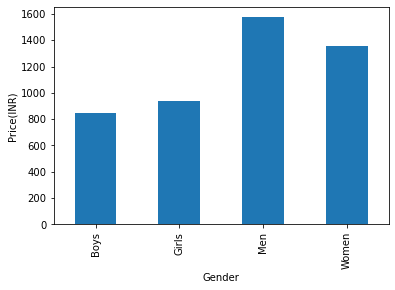

In [132]:
plt.ylabel('Price(INR)')
gender_purchases = men_women_df.groupby("Gender")["Price (INR)"].mean()
gender_purchases.plot.bar()

We can see from the above graph that either men purchase more items or purchase more expensive items than women.